Anhang
==

In [1]:
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
%matplotlib inline
import numpy as np
from numpy import exp, sqrt, log, pi
from scipy.optimize import curve_fit
from scipy.stats import chi2
from scipy import odr
from scipy.integrate import quad
from scipy.signal import find_peaks


def fehler(name, G, sig_G, G_lit, sig_G_lit):
    print(name)
    print('Relativer Fehler: ', sig_G / G * 100)
    print('Rel. Fehler (Vergleich):', sig_G_lit / G_lit * 100)
    print('Absoluter Fehler: ', G - G_lit)
#    print('Verhältnis:', G / G_lit)
    print('Sigma-Abweichung: ', np.abs(G - G_lit) / sqrt(sig_G ** 2 
                                                         + sig_G_lit ** 2),'\n')
    
    
def fehler_small(name, G, sig_G):
    print(name)
    print('Relativer Fehler: ', sig_G / G * 100)
    

def ergebnis(name, G, sig_G, komma, einheit):
    print(name + ' =', np.round(G, komma), '+/-', np.round(sig_G, komma), einheit)
    

def ergebnis_large(name, G, sig_G, komma, einheit):
    print(name + ' =', np.round(G, komma))
    print('+/-'.rjust(len(name) + 2), np.round(sig_G, komma), einheit)
    

def fitparameter(name, G, sig_G, komma, einheit):
    return name + ' = ' + str(np.round(G, komma)) + '$\pm$' + str(np.round(sig_G, komma)) + einheit


def chi_sq(test_func, x_val, y_val, sig_y_val, popt, number):
    chi2_ = np.sum((test_func(x_val, *popt) - y_val) ** 2 
                   / sig_y_val ** 2)
    dof = len(y_val) - number
    chi2_red = chi2_ / dof

    print("chi2 =", chi2_)
    print("chi2_red =",chi2_red)

    prob = np.round(1 - chi2.cdf(chi2_,dof), 2) * 100 
    print("Wahrscheinlichkeit =", prob, "%\n")

Dämpfung des Kreisels
--

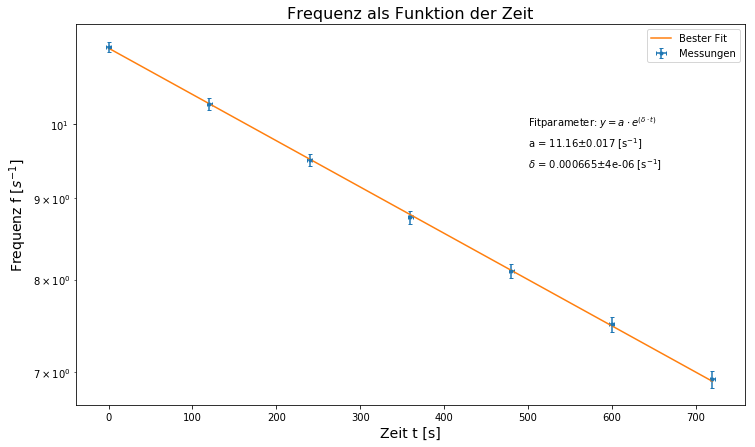

In [2]:
# Messwerte
t = np.array([0, 2, 4, 6, 8, 10, 12]) * 60 # s
sig_t = np.ones(len(t)) * 3

f = np.array([671, 618, 570, 525, 486, 450, 416]) / 60 # s^-1
sig_f = 5 / 60

# Fit
def expo(t, a, delta):
    return a * exp(- t * delta)

popt_1, pcov_1 = curve_fit(expo, t, f, sigma = sig_t, p0 = [0, 0])

a = popt_1[0]
sig_a = sqrt(pcov_1[0, 0])
delta = popt_1[1]
sig_delta = sqrt(pcov_1[1, 1])

x = np.linspace(0, 12 * 60, 100)

# Plot
plt.figure(figsize = (12, 7))
plt.errorbar(t, f, xerr = sig_t, yerr = sig_f, fmt = '.', capsize = 2, 
            label = 'Messungen')
plt.plot(x, expo(x, *popt_1), label = 'Bester Fit')
# Fitparameter
plt.text(500, exp(2.3), 'Fitparameter: $y = a \\cdot e^{(\\delta \\cdot t)}$')
plt.text(500, exp(2.27), fitparameter('a', a, sig_a, 3, ' [s$^{-1}$]'))
plt.text(500, exp(2.24), fitparameter('$\\delta$', delta, sig_delta, 6, ' [s$^{-1}$]'))
plt.title('Frequenz als Funktion der Zeit', size = 16)
plt.xlabel('Zeit t [s]', size = 14)
plt.ylabel('Frequenz f [$s^{-1}$]', size = 14)
plt.yscale('log')
plt.legend(loc = 'best')

plt.savefig('images/213/V213Diagramm1.png')

In [3]:
# chi^2 Analys
chi_sq(expo, t, f, sig_f, popt_1, 2)

chi2 = 0.36191811658481965
chi2_red = 0.07238362331696394
Wahrscheinlichkeit = 100.0 %



In [4]:
# Dämpfungskonstante
ergebnis('Dämpfungskonstante delta', delta, sig_delta, 6, '[s^{-1}]')
# Halbwertszeit
T_12 = log(2) / delta
sig_T_12 = log(2) * sig_delta / (delta ** 2) 
ergebnis('Halbwertszeit T_12', T_12, sig_T_12, 0, '[s]')

Dämpfungskonstante delta = 0.000665 +/- 4e-06 [s^{-1}]
Halbwertszeit T_12 = 1042.0 +/- 6.0 [s]


Präzession
---

In [5]:
# Messwerte 3a
# Winkel 60, 45, 5
T_P = np.array([70, 84, 74]) # s
sig_T_P_a = 5

Mittelwerte: w_F_mean
w_F_mean_0 = [66.3197 31.0267 48.7887 37.8646]
         +/- [0.2535 0.2498 0.2508 0.25  ]  [s^-1]

w_F_mean_1 = [64.0145 56.6129 35.0221 26.3875]
         +/- [0.2543 0.2531 0.2508 0.2507]  [s^-1]

w_F_mean_2 = [69.6795 56.1017 41.5445 26.9936]
         +/- [0.2572 0.2547 0.2525 0.2514]  [s^-1]

w_F_mean_3 = [71.5425 55.3256 40.4637 25.8159]
         +/- [0.2585 0.2553 0.2531 0.2518]  [s^-1]

Steigung 1 Masse, 15 cm: s_0 = 1.851 +/- 0.007 [s^2]
Steigung 1 Masse, 20 cm: s_1 = 1.422 +/- 0.011 [s^2]
Steigung 2 Massen, 15 cm: s_2 = 0.945 +/- 0.008 [s^2]
Steigung 2 Massen, 20 cm: s_3 = 0.708 +/- 0.011 [s^2]


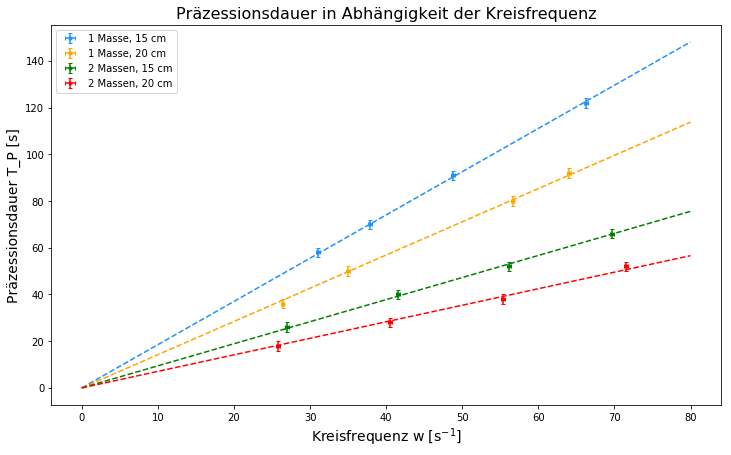

In [6]:
# Messwerte 3b
f_3b = np.array([np.array([659, 302, 480, 370]), # 1 x 15 cm
                np.array([630, 555, 340, 255]), # 1 x 20 cm
                np.array([680, 545, 402, 260]), # 2 x 15 cm
                np.array([695, 535, 390, 248])]) / 60 # 2 x 20 cm

w_3b = 2 * pi * f_3b # s^-1
sig_w_3b = 2 * pi * 2 / 60 * np.ones(len(w_3b))

T_P_3b = np.array([np.array([122, 58, 91, 70]),
                  np.array([92, 80, 50, 36]),
                  np.array([66, 52, 40, 26]),
                  np.array([52, 38, 28, 18])])

sig_T_P = 2

# Endwert w_E
def w_E(w_A, T):
    return w_A * exp(-delta * T)


def sig_w_E(w_A, sig_w_A, T, sig_T):
    return sqrt( (sig_w_A * exp(-delta * T)) ** 2 
                + (w_A * T * sig_delta * exp(- delta * T)) ** 2 
                + (w_A * delta * sig_T * exp(- delta * T)) ** 2)

w_3b_E = w_E(w_3b, T_P_3b)
sig_w_3b_E = sig_w_E(w_3b, sig_w_3b, T_P_3b, sig_T_P)

# Mittleres w_F
w_mean_test = (w_3b - w_3b_E) / (delta * T_P_3b)
sig_w_mean_test = sqrt( (sig_w_3b / (delta * T_P_3b)) ** 2 
                       + (sig_w_3b_E / (delta * T_P_3b)) ** 2 
                       + ((w_3b - w_3b_E) * sig_delta / (delta ** 2 * T_P_3b) ) ** 2 
                       + ((w_3b - w_3b_E) * sig_T_P / (delta * T_P_3b ** 2) ) ** 2 )


w_F_mean = (w_3b + w_3b_E) / 2
sig_w_F_mean = sqrt((sig_w_3b ** 2 + sig_w_3b_E)) / 2


# Drücke Mittelwert aus
print('Mittelwerte: w_F_mean')
for i in range(len(w_3b)):
    ergebnis_large('w_F_mean_' + str(i), w_F_mean[i], sig_w_F_mean[i], 4, 
                   ' [s^-1]\n')


# Fit
def line(x, a):
    return a * x

x = np.linspace(0, 80, 200)

popt_3b = np.array([])
pcov_3b = np.array([])

for i in range(len(w_3b)):
    popt_i, pcov_i = curve_fit(line, w_F_mean[i], T_P_3b[i], sigma = sig_w_F_mean[i], 
                               p0 = [0])
    popt_3b = np.append(popt_3b, popt_i)
    pcov_3b = np.append(pcov_3b, pcov_i)

    
# Vorbereitung für Plot
name = np.array(['1 Masse, 15 cm', '1 Masse, 20 cm', '2 Massen, 15 cm', 
                 '2 Massen, 20 cm'])
col = np.array(['dodgerblue', 'orange', 'green', 'red'])

# Plot
plt.figure(figsize = (12, 7))
plt.title('Präzessionsdauer in Abhängigkeit der Kreisfrequenz', size = 16)

for i in range(len(w_3b)):
    plt.errorbar(w_F_mean[i], T_P_3b[i], xerr = sig_w_F_mean[i], yerr = sig_T_P, 
                fmt = '.', capsize = 2, label = name[i], color = col[i])
    plt.plot(x, line(x, popt_3b[i]), #label = 'Bester Fit: ' + name[i],
            color = col[i], linestyle = '--')
    
    ergebnis('Steigung ' + name[i] + ': s_' + str(i), popt_3b[i], sqrt(pcov_3b[i]), 3, '[s^2]')

    
plt.xlabel('Kreisfrequenz w [s$^{-1}$]', size = 14)
plt.ylabel('Präzessionsdauer T_P [s]', size = 14)
plt.legend(loc = 'best')

plt.savefig('images/213/V213Diagramm2.png')

In [7]:
# chi^2 Analyse
for i in range(len(w_3b)):
    print(name[i] + ':')
    chi_sq(line, w_F_mean[i], T_P_3b[i], sig_T_P, np.array([popt_3b[i]]), 1)

1 Masse, 15 cm:
chi2 = 0.3462392602008266
chi2_red = 0.11541308673360888
Wahrscheinlichkeit = 95.0 %

1 Masse, 20 cm:
chi2 = 0.8890425987064264
chi2_red = 0.29634753290214216
Wahrscheinlichkeit = 83.0 %

2 Massen, 15 cm:
chi2 = 0.4611971798198711
chi2_red = 0.15373239327329036
Wahrscheinlichkeit = 93.0 %

2 Massen, 20 cm:
chi2 = 0.9212290670614741
chi2_red = 0.307076355687158
Wahrscheinlichkeit = 82.0 %



In [8]:
# Trägheitsmoment
m_g = 0.00985 # kg
g = 9.81 # m s^-2
l = np.array([0.15, 0.15, 0.2, 0.2]) # m
sig_l = 0.002
m = np.array([1, 1, 2, 2]) * m_g

I_z = m * g * l / (2 * pi) * popt_3b 
sig_I_z = I_z * sqrt( (sig_l / l) ** 2 + (sqrt(pcov_3b) / popt_3b) ** 2)

ergebnis_large('I_z', I_z, sig_I_z, 5, '[kg m^2]')

I_z_mean = np.mean(I_z)
sig_I_z_mean = 1 / sqrt(len(I_z) - 1) * np.std(I_z)

# Trägheitsmoment des Kreisels
ergebnis('I_z_mean', I_z_mean, sig_I_z_mean, 4, '[kg m^2]')

# Trägheitsmoment Literatur
m_k = 4.164 # kg
r_k = 0.0508 # m
I_z_lit = 2 / 5 * m_k * r_k ** 2

print('I_z_lit =', np.round(I_z_lit, 4), '[kg m^2]')

I_z = [0.00427 0.00328 0.00581 0.00435]
  +/- [6.e-05 5.e-05 8.e-05 8.e-05] [kg m^2]
I_z_mean = 0.0044 +/- 0.0005 [kg m^2]
I_z_lit = 0.0043 [kg m^2]


Umlauf der momentanen Drehachse
---

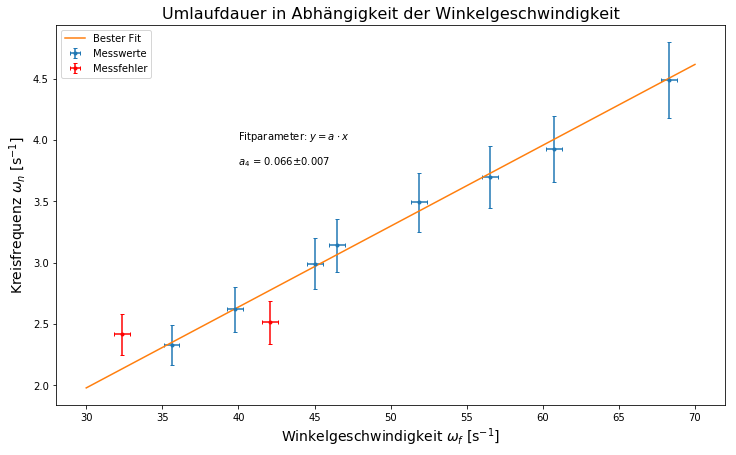

In [9]:
# Messwerte
f_4 = np.array([652, 580, 540, 495, 430, 380, 340, 444, 402, 309]) / 60 # s^-1
f_4_mf = f_4[[8, 9]]
mask = np.ones(len(f_4), dtype = bool) # Problematische Messungen entfernen
mask[[8, 9]] = False

f_4 = f_4[mask, ...]

w_4 = 2 * pi * f_4
w_4_mf = 2 * pi * f_4_mf
sig_w_4 = 2 * pi * 5 / 60

Omega_10 = np.array([14, 16, 17, 18, 21, 24, 27, 20, 25, 26]) / 10 # s 
#(Umlaufdauer, falsch benannt aber jetzt zu spät)
Omega_10_mf = Omega_10[[8, 9]]
Omega_10 = Omega_10[mask, ...]

sig_Omega_10 = 0.3 / 10

Omega = 2 * pi / Omega_10
Omega_mf = 2 * pi / Omega_10_mf
sig_Omega = sqrt(2 * pi * sig_Omega_10 / Omega_10 ** 2)
sig_Omega_mf = sqrt(2 * pi * sig_Omega_10 / Omega_10_mf ** 2)

# Fit
popt_4b, pcov_4b = curve_fit(line, w_4, Omega, absolute_sigma = True, p0 = [0])
a_4 = popt_4b[0]
sig_a_4 = sqrt(pcov_4b[0, 0])

x = np.linspace(30, 70, 100)

# Plot
plt.figure(figsize = (12, 7))
plt.errorbar(w_4, Omega, xerr = sig_w_4, yerr = sig_Omega, fmt = '.',
            capsize = 2, label = 'Messwerte')
plt.errorbar(w_4_mf, Omega_mf, xerr = sig_w_4, yerr = sig_Omega_mf, fmt = '.',
            capsize = 2, label = 'Messfehler', color = 'red')
plt.plot(x, line(x, *popt_4b), label = 'Bester Fit')
plt.text(40, 4, 'Fitparameter: $y = a \\cdot x$')
plt.text(40, 3.8, fitparameter('$a_4$', a_4, sig_a_4, 3, ''))
plt.title('Umlaufdauer in Abhängigkeit der Winkelgeschwindigkeit', size = 16)
plt.xlabel('Winkelgeschwindigkeit $\\omega_f$ [s$^{-1}$]', size = 14)
plt.ylabel('Kreisfrequenz $\\omega_n$ [s$^{-1}$]', size = 14)
plt.legend(loc = 'best')

plt.savefig('images/213/V213Diagramm3.png')

In [10]:
# chi^2 Analyse
chi_sq(line, w_4, Omega, sig_Omega, popt_4b, 1)

chi2 = 0.34370714549490805
chi2_red = 0.04910102078498686
Wahrscheinlichkeit = 100.0 %



In [20]:
# Trägheitsmoment
I_x4 = I_z_mean * (1 + 1 / (1 / a_4 - 1))
sig_I_x4 = sqrt( (sig_I_z_mean * (1 + 1 / (1 / a_4 - 1))) ** 2 
                + (I_z_mean * sig_a_4 / ((1 / a_4 - 1) ** 2 * a_4 ** 2)) ** 2)

ergebnis('I_x4', I_x4, sig_I_x4, 5, '[kg m^2]')

I_x4 = 0.00474 +/- 0.00056 [kg m^2]


Nutation
--

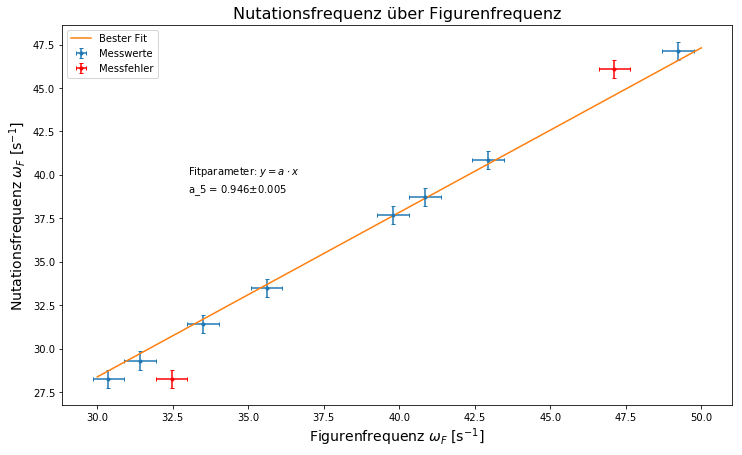

In [12]:
# Messwerte
f_F5 = np.array([410, 390, 380, 470, 450, 340, 320, 310, 300, 290]) / 60 # s^-1
f_F5_mf = f_F5[[4, 7]]
f_N5 = np.array([390, 370, 360, 450, 440, 320, 300, 270, 280, 270]) / 60 # s^-1
f_N5_mf = f_N5[[4, 7]]
sig_f_5 = 5 / 60

mask = np.ones(len(f_F5), dtype = bool) # Problematische Messungen entfernen
mask[[4, 7]] = False

f_F5 = f_F5[mask, ...]
f_N5 = f_N5[mask, ...]

w_F5 = 2 * pi * f_F5
w_F5_mf = 2 * pi * f_F5_mf
w_N5 = 2 * pi * f_N5
w_N5_mf = 2 * pi * f_N5_mf
sig_w_5 =  2 * pi * sig_f_5

# Fit
poopt_5, pcov_5 = curve_fit(line, w_F5, w_N5, absolute_sigma = True, 
                            sigma = sig_w_5 * np.ones(len(w_F5))) # hehe
a_5 = poopt_5[0]
sig_a_5 = sqrt(pcov_5[0, 0])

x = np.linspace(30, 50, 100)

plt.figure(figsize = (12, 7))
plt.title('Nutationsfrequenz über Figurenfrequenz', size = 16)
plt.xlabel('Figurenfrequenz $\\omega_F$ [s$^{-1}$]', size = 14)
plt.ylabel('Nutationsfrequenz $\\omega_F$ [s$^{-1}$]', size = 14)
plt.errorbar(w_F5, w_N5, xerr = sig_w_5, yerr = sig_w_5, fmt = '.',
            capsize = 2, label = 'Messwerte')
plt.errorbar(w_F5_mf, w_N5_mf, xerr = sig_w_5, yerr = sig_w_5, fmt = '.',
            capsize = 2, label = 'Messfehler', color = 'red')
plt.plot(x, line(x, *poopt_5), label = 'Bester Fit')
plt.text(33, 40, 'Fitparameter: $y = a \\cdot x$')
plt.text(33, 39, fitparameter('a_5', a_5, sig_a_5, 3, ''))
plt.legend(loc = 'best')

plt.savefig('images/213/V213Diagramm4.png')

In [19]:
# Trägheitsmomente
I_x5 = I_z_mean / a_5
sig_I_x5 = sqrt( (sig_I_z_mean / a_5) ** 2 + (I_z_mean * sig_a_5 / a_5 **2)**2)
#I_x5 = I_z_mean * (1 + 1 / (1 / a_5 - 1))
#sig_I_x5 = sqrt( (sig_I_z_mean * (1 + 1 / (1 / a_5 - 1))) ** 2 
 #               + (I_z_mean * sig_a_5 / ((1 / a_5 - 1) ** 2 * a_5 ** 2)) ** 2)

ergebnis('I_x5', I_x5, sig_I_x5, 5, '')

I_x5 = 0.00468 +/- 0.00055 


In [14]:
# chi^2 Analyse
chi_sq(line, w_F5, w_N5, sig_w_5, poopt_5, 1)

chi2 = 3.1299183370452397
chi2_red = 0.4471311910064628
Wahrscheinlichkeit = 87.0 %



Sigmas
--

In [15]:
# Präzessionszeiten
fehler('T_P: 60-45', T_P[0], sig_T_P_a, T_P[1], sig_T_P_a)
fehler('T_P: 60-5', T_P[0], sig_T_P_a, T_P[2], sig_T_P_a)
fehler('T_P: 45-5', T_P[1], sig_T_P_a, T_P[2], sig_T_P_a)

T_P: 60-45
Relativer Fehler:  7.142857142857142
Rel. Fehler (Vergleich): 5.952380952380952
Absoluter Fehler:  -14
Sigma-Abweichung:  1.979898987322333 

T_P: 60-5
Relativer Fehler:  7.142857142857142
Rel. Fehler (Vergleich): 6.756756756756757
Absoluter Fehler:  -4
Sigma-Abweichung:  0.565685424949238 

T_P: 45-5
Relativer Fehler:  5.952380952380952
Rel. Fehler (Vergleich): 6.756756756756757
Absoluter Fehler:  10
Sigma-Abweichung:  1.414213562373095 



In [16]:
# Mittlere Kreisfrequenz: arithmetisch und kontinuierlich
for i in range(len(w_F_mean)):
    fehler('w_mean_' + str(i), w_F_mean[i], sig_w_F_mean[i], 
           w_mean_test[i], 0) # Fehler des Test Mittelwertes wird auf 0 gesetzt

w_mean_0
Relativer Fehler:  [0.3822406 0.8049968 0.5139914 0.6602593]
Rel. Fehler (Vergleich): [0. 0. 0. 0.]
Absoluter Fehler:  [0.03640306 0.00385113 0.01490406 0.00684537]
Sigma-Abweichung:  [0.14360137 0.0154191  0.05943327 0.027381  ] 

w_mean_1
Relativer Fehler:  [0.39729177 0.44713098 0.71624003 0.94988776]
Rel. Fehler (Vergleich): [0. 0. 0. 0.]
Absoluter Fehler:  [0.01998726 0.013367   0.0032307  0.00126194]
Sigma-Abweichung:  [0.07858963 0.05280609 0.01287939 0.00503465] 

w_mean_2
Relativer Fehler:  [0.36912916 0.45390905 0.60784638 0.93129681]
Rel. Fehler (Vergleich): [0. 0. 0. 0.]
Absoluter Fehler:  [0.01119879 0.00559748 0.00245281 0.00067337]
Sigma-Abweichung:  [0.04353992 0.02198102 0.00971309 0.0026786 ] 

w_mean_3
Relativer Fehler:  [0.36130459 0.46152157 0.62556983 0.9753786 ]
Rel. Fehler (Vergleich): [0. 0. 0. 0.]
Absoluter Fehler:  [0.00713807 0.002948   0.00117065 0.00030867]
Sigma-Abweichung:  [0.02761488 0.01154541 0.00462474 0.00122582] 



In [17]:
# Trägheitsmoment I_z
fehler('I_z', I_z_mean, sig_I_z_mean, I_z_lit, 0)

I_z
Relativer Fehler:  11.777299166022564
Rel. Fehler (Vergleich): 0.0
Absoluter Fehler:  0.00013033143724419573
Sigma-Abweichung:  0.24988061574493717 



In [21]:
# Trägheitsmoment I_x
fehler('I_x', I_x4, sig_I_x4, I_x5, sig_I_x5)

I_x
Relativer Fehler:  11.800147127737853
Rel. Fehler (Vergleich): 11.788295793975136
Absoluter Fehler:  6.066033029899359e-05
Sigma-Abweichung:  0.07719777922767168 

